In [330]:
# Importación de librerías

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import joblib

# Estadística y normalización
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder

# Modelos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,  LogisticRegression

# Metricas  
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [331]:
#Carga del dataset
df = pd.read_csv("dataset_estudiantes.csv")


# ANÁLISIS EXPLORATORIO

In [332]:
df.head() #mostramos filas


,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nivel_dificultad,tiene_tutor,horario_estudio_preferido,estilo_aprendizaje,nota_final,aprobado
0,8.957476,48.830601,86.640182,6.675694,25,Fácil,Sí,Tarde,Lectura/Escritura,84.4,1
1,11.042524,80.825707,83.449655,4.616844,18,Difícil,No,Tarde,NaN,72.0,1
2,4.510776,90.383694,74.623607,7.755246,25,Fácil,No,Mañana,Lectura/Escritura,80.0,1
3,6.647213,81.878257,82.849841,8.592826,23,Fácil,No,NaN,Visual,78.2,1
4,1.000000,66.254179,54.539935,6.671840,21,Medio,No,NaN,Auditivo,66.0,1


In [333]:
print(f"El número de filas que tenemos es {df.shape[0]}, y el número de columnas es {df.shape[1]}")
df.info()

El número de filas que tenemos es 1000, y el número de columnas es 11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   horas_estudio_semanal      1000 non-null   float64
 1   nota_anterior              1000 non-null   float64
 2   tasa_asistencia            1000 non-null   float64
 3   horas_sueno                850 non-null    float64
 4   edad                       1000 non-null   int64  
 5   nivel_dificultad           1000 non-null   object 
 6   tiene_tutor                1000 non-null   object 
 7   horario_estudio_preferido  900 non-null    object 
 8   estilo_aprendizaje         950 non-null    object 
 9   nota_final                 1000 non-null   float64
 10  aprobado                   1000 non-null   int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 86.1+ KB


### Identificación nulos y duplicados

In [334]:
df.isna().sum()

horas_estudio_semanal          0
nota_anterior                  0
tasa_asistencia                0
horas_sueno                  150
edad                           0
nivel_dificultad               0
tiene_tutor                    0
horario_estudio_preferido    100
estilo_aprendizaje            50
nota_final                     0
aprobado                       0
dtype: int64

In [335]:
df.duplicated().sum()

np.int64(0)

### Identificar variables numéricas y categóricas

In [336]:
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Variables numéricas:\n\n", num_cols)
print("\nVariables categóricas:\n\n", cat_cols)

Variables numéricas:

 Index(['horas_estudio_semanal', 'nota_anterior', 'tasa_asistencia',
       'horas_sueno', 'edad', 'nota_final', 'aprobado'],
      dtype='object')

Variables categóricas:

 Index(['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido',
       'estilo_aprendizaje'],
      dtype='object')


## Variables numéricas

### Estadísticas descriptivas

In [337]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
horas_estudio_semanal,1000.0,10.07,4.85,1.0,6.63,10.00,13.37,25.0
nota_anterior,1000.0,69.89,14.69,30.0,59.88,70.00,80.12,100.0
tasa_asistencia,1000.0,73.99,18.20,20.0,61.51,75.00,88.49,100.0
horas_sueno,850.0,7.01,1.44,4.0,6.00,7.02,8.02,10.0
edad,1000.0,23.53,3.48,18.0,21.00,24.00,27.00,29.0
nota_final,1000.0,71.44,9.56,30.0,64.78,71.40,77.90,100.0
aprobado,1000.0,0.90,0.30,0.0,1.00,1.00,1.00,1.0


Histogramas para variables numéricas

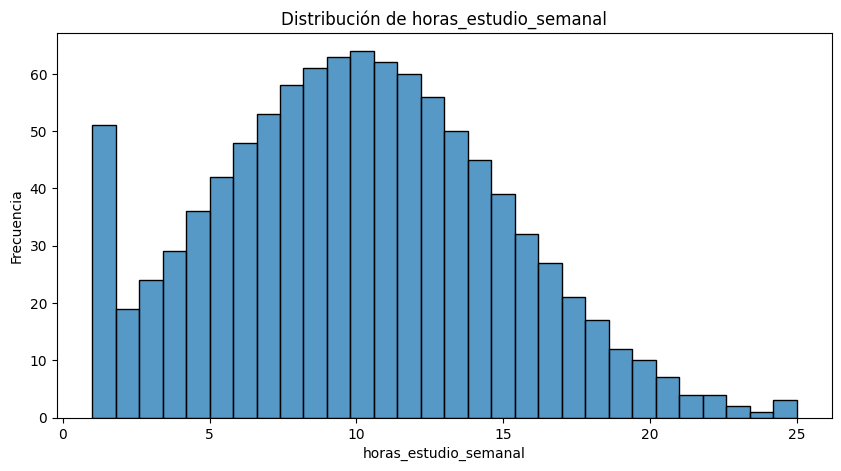

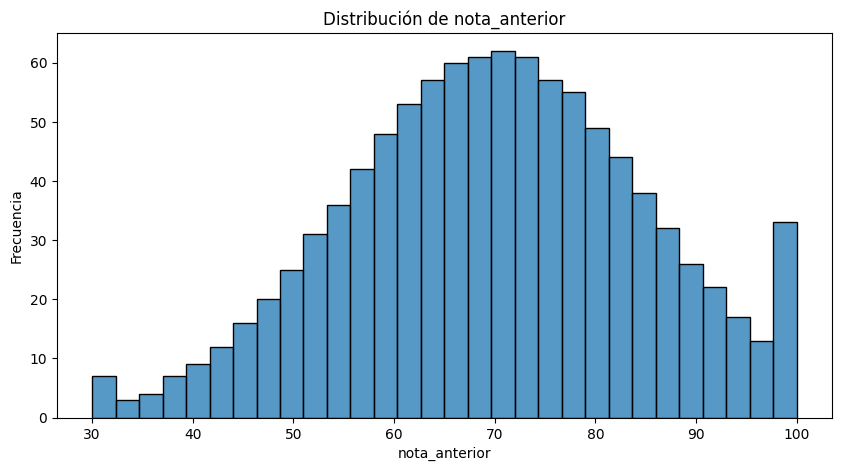

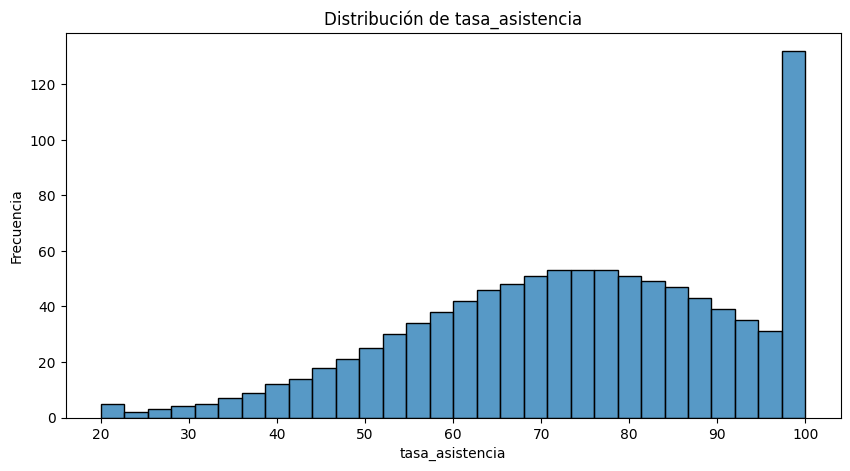

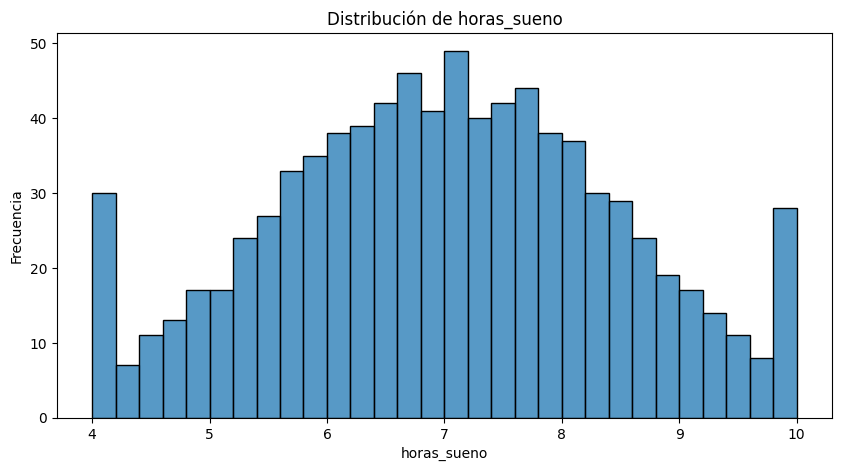

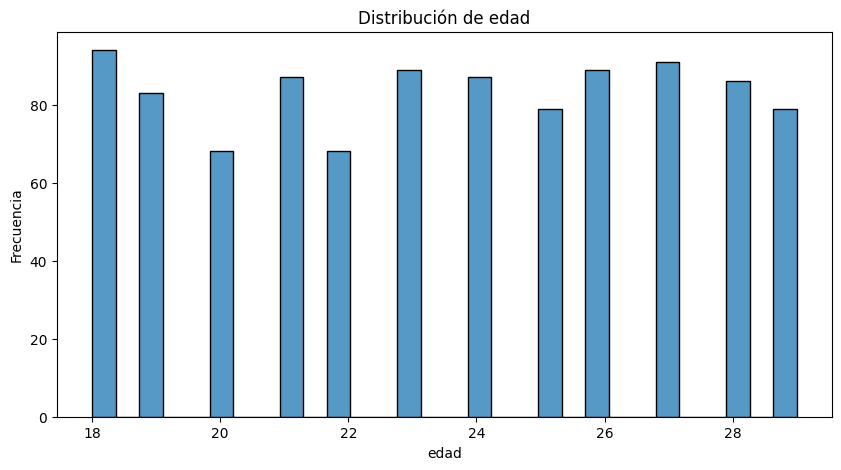

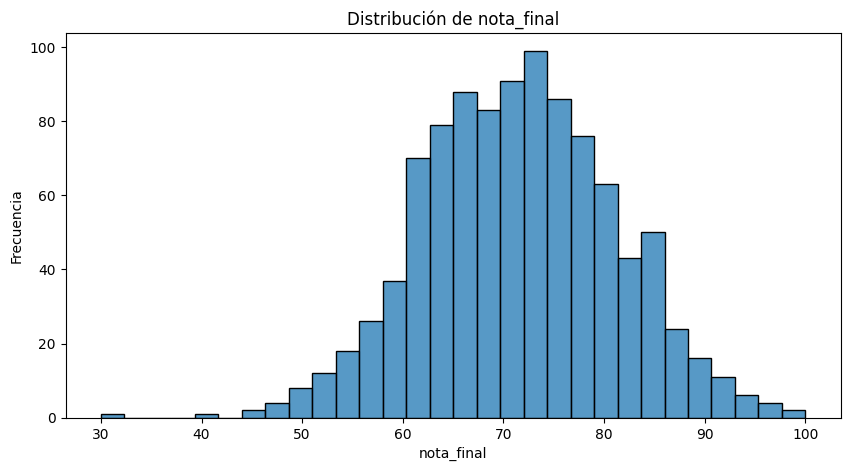

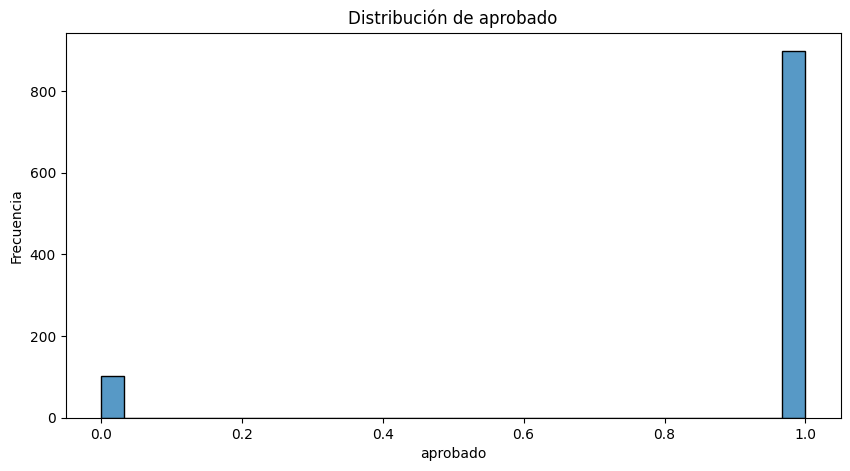

In [338]:
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30, edgecolor='black')

    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    plt.show()

### MATRIZ DE CORRELACIONES

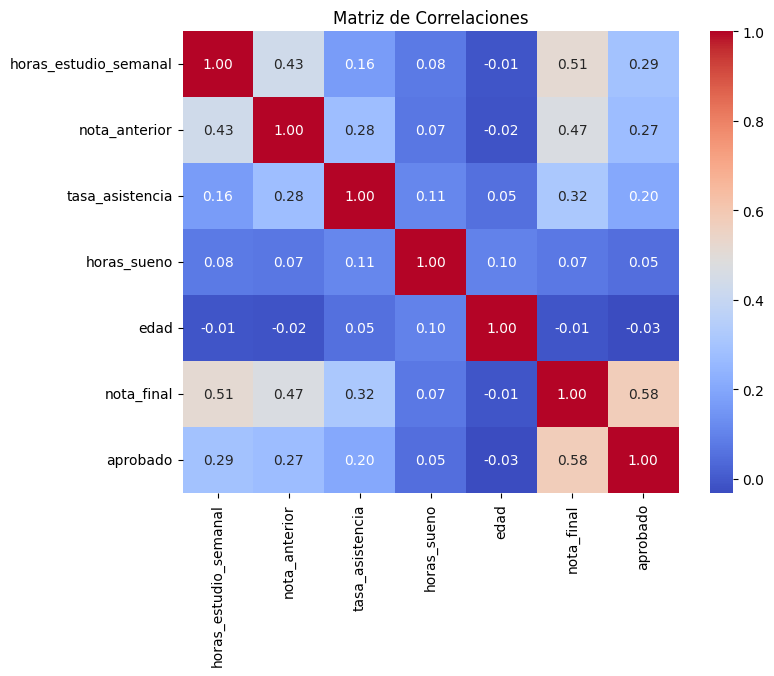

In [339]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()


## Variables categóricas


### Estadísticas descriptivas

In [340]:
df.describe(include = "object").T

,count,unique,top,freq
nivel_dificultad,1000,3,Medio,504
tiene_tutor,1000,2,No,597
horario_estudio_preferido,900,3,Noche,344
estilo_aprendizaje,950,4,Visual,363


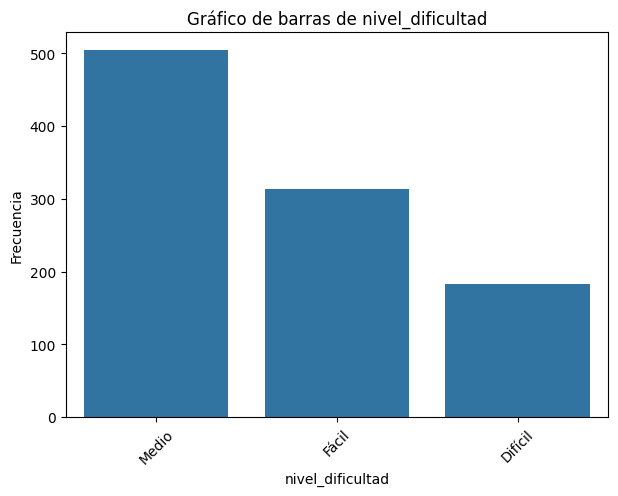

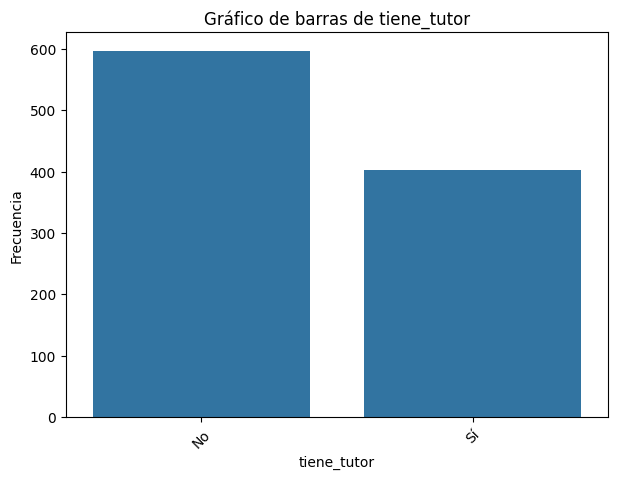

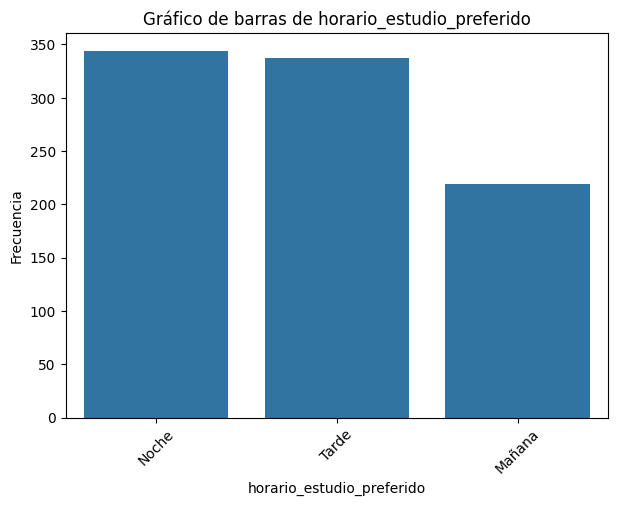

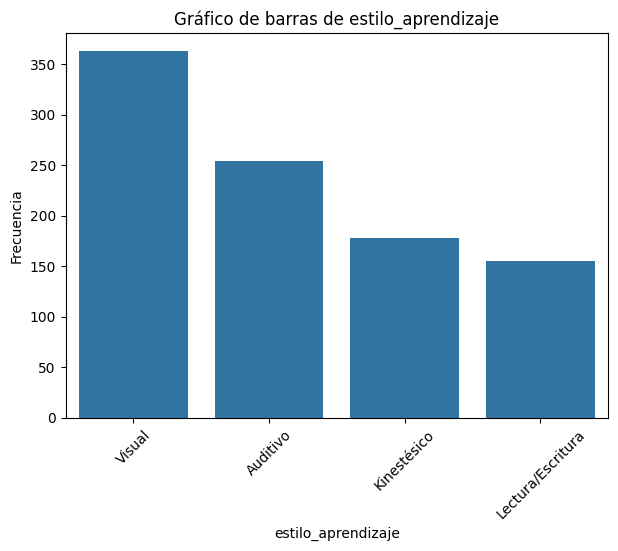

In [341]:
for col in cat_cols:
    num_categories = df[col].nunique()
    width = max(7, min(num_categories * 0.5, 25))
    height = 5  # Altura fija

    plt.figure(figsize=(width, height))
    sns.countplot(x=df[col], order=df[col].value_counts().index)

    plt.title(f'Gráfico de barras de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)

    plt.show()

# PREPROCESAMIENTO

## Gestión de nulos

In [342]:
# Identificación de valores nulos
cantidad_nulos = df.isna().sum()  # Suma valores nulos por columna
cantidad_nulos = cantidad_nulos[cantidad_nulos != 0]  # Filtra solo columnas con valores nulos

cantidad_nulos  # Muestra el resultado

horas_sueno                  150
horario_estudio_preferido    100
estilo_aprendizaje            50
dtype: int64

In [343]:
#Imputación de nulos 

# Valor desconocido
val = 'Unknown'

# Columnas categoricas
cols_cat = ['horario_estudio_preferido', 'estilo_aprendizaje']

#Imputación con la moda
for col in cols_cat:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Imputación de valores numéricos con la mediana
df['horas_sueno'] = df['horas_sueno'].fillna(df['horas_sueno'].median())


C:\Users\Carlota\AppData\Local\Temp\ipykernel_12952\2873972907.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


## Gestión de outliers

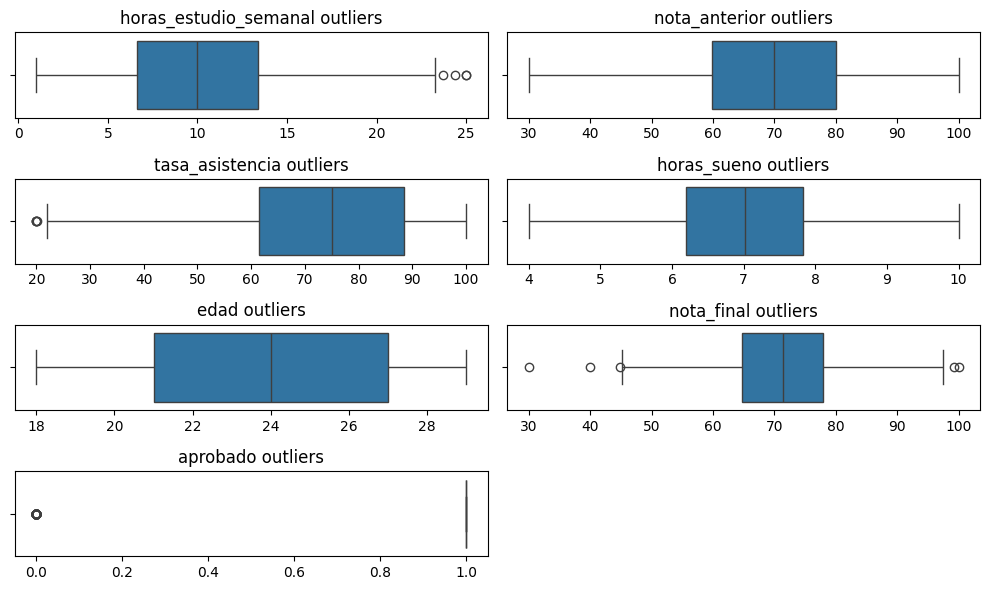

In [344]:
# Visualización de outliers en variables numéricas mediante diagramas de caja

# Seleccionar solo columnas numéricas del DataFrame
df_num = df.select_dtypes(include=np.number)
cols_num = df_num.columns

# Calcular el número de gráficos y filas necesarias
n_plots = len(cols_num)
num_rows = math.ceil(n_plots / 2)  # Se distribuyen en 2 columnas

# Ajustar dinámicamente el tamaño de la figura
width = 5 * 2
height = 1.5 * num_rows
size = (width, height)

# Crear la estructura de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=size)
axes = axes.flat  # Convertir matriz de ejes a lista plana

# Crear un boxplot para cada variable numérica
for i, col in enumerate(cols_num):
   sns.boxplot(
       x=col,
       data=df_num,
       ax=axes[i]
   )

   axes[i].set_title(f'{col} outliers')
   axes[i].set_xlabel('')  # Eliminar etiqueta del eje x para mayor claridad

# Eliminar el último gráfico si sobra un espacio vacío
if n_plots % 2 != 0:
   fig.delaxes(axes[-1])

# Ajustar el layout y mostrar la figura
plt.tight_layout()
plt.show()


In [345]:
df_clean = df_num.copy()

# Iterar sobre cada columna numérica
for col in df_num.columns:
   # Calcular los cuartiles Q1 y Q3
   Q1 = df_num[col].quantile(0.25)
   Q3 = df_num[col].quantile(0.75)
   IQR = Q3 - Q1  # Calcular el rango intercuartil

   # Definir los límites para detectar outliers (método de la valla)
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR

   # Mantener solo los valores dentro de los límites
   df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


print("Filas después de eliminar outliers:", len(df_clean))

df_clean=df


Filas después de eliminar outliers: 889


## MODELO REGRESIÓN

In [346]:
# Hacemos una copia del DataFrame
df_reg = df.copy()

# Seleccionamos la variable objetivo 
tv = 'nota_final'

#### Codificación

In [347]:
cat_cols = df_reg.select_dtypes(include='O').columns.to_list() 
cat_cols

['nivel_dificultad',
 'tiene_tutor',
 'horario_estudio_preferido',
 'estilo_aprendizaje']

In [348]:
# Codificación OneHot
onehot_cols = ['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido', 'estilo_aprendizaje']
onehot_encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(df_reg[onehot_cols])
onehot_feature_names = onehot_encoder.get_feature_names_out()
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_feature_names, index=df_reg.index)

# Concatenar con el DataFrame original y eliminar las columnas originales
df_reg = pd.concat([df_reg.drop(columns=onehot_cols), df_onehot], axis=1)

#### Escalado

In [349]:
#Escalamos las variables entre [0,1]
scaler = MinMaxScaler()
df_reg[df_reg.drop(columns=[tv]).columns] = scaler.fit_transform(df_reg.drop(columns=[tv]))

In [350]:
#Guardamos dataframe
df_reg.to_csv('df_regresion.csv')

## MODELO CLASIFICACIÓN 

In [351]:
# Copia del DataFrame
df_clas = df.copy()

# Nueva variable objetivo
tv = 'aprobado'

#### Codificación

In [352]:
cat_cols = df_clas.select_dtypes(include='O').columns.to_list()
cat_cols

['nivel_dificultad',
 'tiene_tutor',
 'horario_estudio_preferido',
 'estilo_aprendizaje']

In [353]:
# Codificación OneHot
onehot_cols = ['nivel_dificultad', 'tiene_tutor', 'horario_estudio_preferido', 'estilo_aprendizaje']
onehot_encoder = OneHotEncoder(drop=None, sparse_output=False, handle_unknown='ignore')
onehot_encoded = onehot_encoder.fit_transform(df_clas[onehot_cols])
onehot_feature_names = onehot_encoder.get_feature_names_out()
df_onehot = pd.DataFrame(onehot_encoded, columns=onehot_feature_names, index=df_clas.index)

# Concatenar con el DataFrame original y eliminar las columnas originales
df_clas = pd.concat([df_clas.drop(columns=onehot_cols), df_onehot], axis=1)

#### Escalado

In [354]:
scaler = MinMaxScaler()
df_clas[df_clas.columns] = scaler.fit_transform(df_clas)

In [355]:
#Guardamos el dataframe
df_clas.to_csv('df_clasificacion.csv')

# MODELO REGRESIÓN

In [356]:
#Importamos el dataframe de regresión
df = pd.read_csv('df_regresion.csv', index_col=0)
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nota_final,aprobado,nivel_dificultad_Difícil,nivel_dificultad_Fácil,nivel_dificultad_Medio,tiene_tutor_No,tiene_tutor_Sí,horario_estudio_preferido_Mañana,horario_estudio_preferido_Noche,horario_estudio_preferido_Tarde,estilo_aprendizaje_Auditivo,estilo_aprendizaje_Kinestésico,estilo_aprendizaje_Lectura/Escritura,estilo_aprendizaje_Visual
0,0.331561,0.269009,0.833002,0.445949,0.636364,84.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.418439,0.726082,0.793121,0.102807,0.000000,72.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.146282,0.862624,0.682795,0.625874,0.636364,80.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235301,0.741118,0.785623,0.765471,0.454545,78.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.517917,0.431749,0.445307,0.272727,66.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Definición de los datos

In [357]:
# Variable objetivo
tv = 'nota_final'

# Definimos las variables x (predictoras) e y (objetivo) 
X = df.drop(columns=[tv])  # Características
y = df[tv]  # Etiqueta o resultado

In [358]:
# Dividimos datos (90% entrenamiento y 10% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Mostramos tamaños 
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (900, 18)
Tamaño del conjunto de prueba: (100, 18)


## Entrenamiento del modelo

In [359]:
modelo = LinearRegression() #definimos modelo lineal
modelo.fit(X_train, y_train) #ajustamos
y_pred = modelo.predict(X_test) #predicciones con los datos de prueba


## Comparación datos modelo y reales

### Gráficas

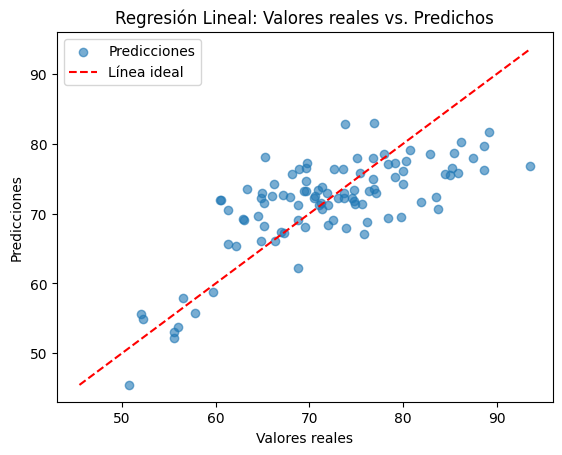

In [360]:
# Graficar valores reales vs. predichos por el modelo
plt.scatter(y_test, y_pred, label="Predicciones", alpha=0.6)

# Agregar línea de referencia (y = x)
min_val = min(y_test.min(), y_pred.min())  # Valor mínimo entre reales y predichos
max_val = max(y_test.max(), y_pred.max())  # Valor máximo entre reales y predichos
plt.plot([min_val, max_val], [min_val, max_val], color="red", linestyle="--", label="Línea ideal")

plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal: Valores reales vs. Predichos")
plt.legend()
plt.show()

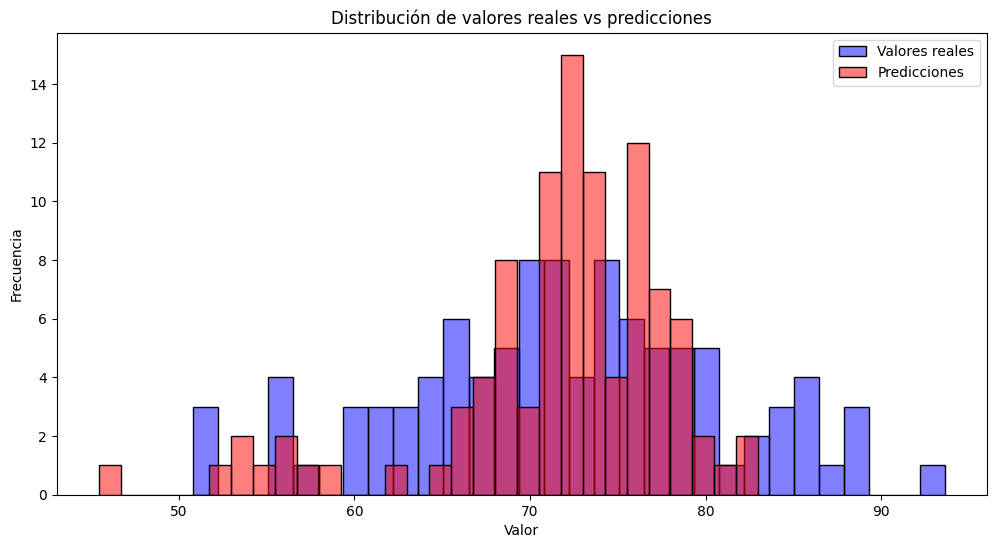

In [361]:
# Graficar valores en un histograma

plt.figure(figsize=(12, 6))

n_bins = 30

# Histograma de y_test (azul)
sns.histplot(y_test, bins=n_bins, edgecolor='black', color='blue', alpha=0.5, label='Valores reales')

# Histograma de y_pred (rojo)
sns.histplot(y_pred, bins=n_bins, edgecolor='black', color='red', alpha=0.5, label='Predicciones')

plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.title('Distribución de valores reales vs predicciones')
plt.legend()
plt.show()

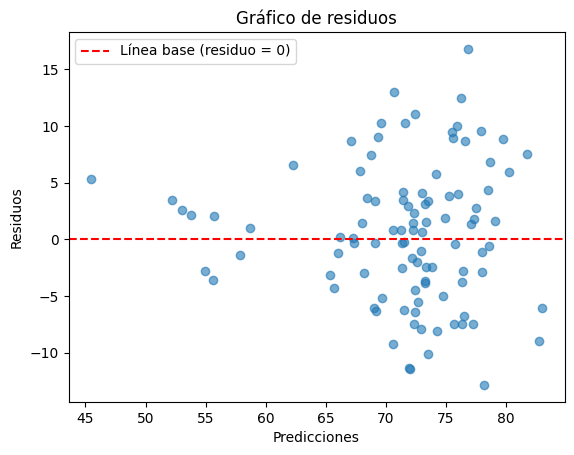

In [362]:
# Calcular los residuos
residuos = y_test - y_pred

# Graficar residuos
plt.scatter(y_pred, residuos, alpha=0.6)
plt.axhline(y=0, color="red", linestyle="--", label="Línea base (residuo = 0)")

# Etiquetas y título
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos")
plt.legend()

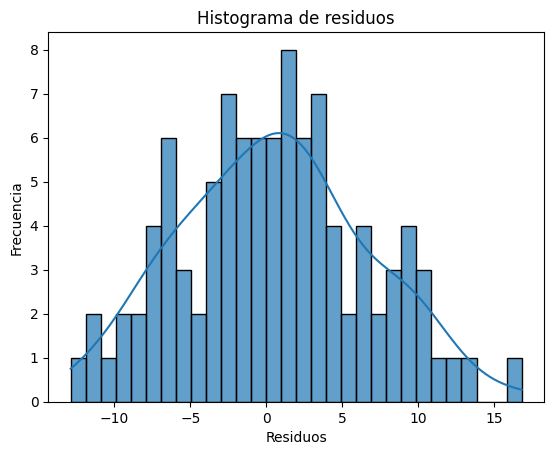

In [363]:
# Graficar histograma de los residuos
sns.histplot(residuos, bins=30, kde=True, edgecolor="black", alpha=0.7)

# Etiquetas y título
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de residuos")

# Mostrar gráfico
plt.show()

### Métricas

In [364]:

y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

print(f" R2 del conjunto de entrenamiento : {r2_score(y_train, y_train_pred)}")
print(f" R2 del conjunto de prueba : {r2_score(y_test, y_test_pred)}")


 R2 del conjunto de entrenamiento : 0.5301926802556394
 R2 del conjunto de prueba : 0.5389486953354382


## Entrenamiento final

In [365]:

# Entrenar el modelo con todo el conjunto de datos
model_final = LinearRegression()
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, "modelo_regresion.pkl")

['modelo_regresion.pkl']

# MODELO CLASIFICACIÓN

In [366]:
#cargamos los datos
df = pd.read_csv('df_clasificacion.csv', index_col=0)
df.head()

,horas_estudio_semanal,nota_anterior,tasa_asistencia,horas_sueno,edad,nota_final,aprobado,nivel_dificultad_Difícil,nivel_dificultad_Fácil,nivel_dificultad_Medio,tiene_tutor_No,tiene_tutor_Sí,horario_estudio_preferido_Mañana,horario_estudio_preferido_Noche,horario_estudio_preferido_Tarde,estilo_aprendizaje_Auditivo,estilo_aprendizaje_Kinestésico,estilo_aprendizaje_Lectura/Escritura,estilo_aprendizaje_Visual
0,0.331561,0.269009,0.833002,0.445949,0.636364,0.777143,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.418439,0.726082,0.793121,0.102807,0.000000,0.600000,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.146282,0.862624,0.682795,0.625874,0.636364,0.714286,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.235301,0.741118,0.785623,0.765471,0.454545,0.688571,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.517917,0.431749,0.445307,0.272727,0.514286,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


## Definición de los datos

In [367]:
# Variable objetivo
tv = 'aprobado'

# Definimos las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[tv])  # Características
y = df[tv]  # Etiqueta o resultado

In [368]:
# Dividimos los datos en 80% entrenamiento y 20% prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostramos los tamaños de los conjuntos resultantes
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 18)
Tamaño del conjunto de prueba: (200, 18)


## Entrenamiento del modelo

In [369]:
# Crear una instancia de LogisticRegression
model = LogisticRegression(penalty='l2', C=1.0,  max_iter=200)

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [370]:
# Hacer predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Obtener probabilidades de predicción
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidad de la clase positiva

## Comparación datos modelo y reales

### Matriz de confusión

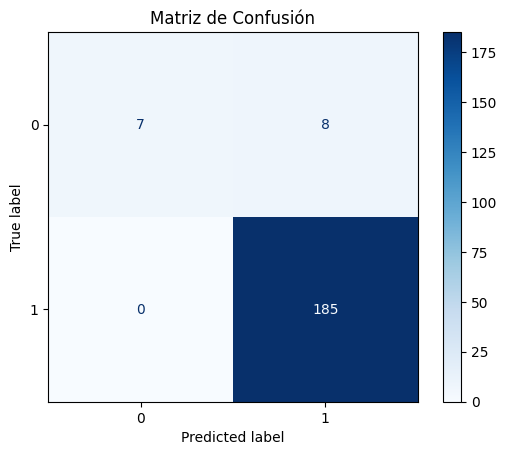

In [371]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión")
plt.show()

#### Métricas

In [372]:
# Calcular predicciones para el conjunto de entrenamiento y prueba
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Obtener las probabilidades de predicción
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

In [373]:
# Cálculo de métricas
metrics = {
    "train": {
        "Accuracy": accuracy_score(y_train, y_train_pred),
        "Precision": precision_score(y_train, y_train_pred),
        "Recall": recall_score(y_train, y_train_pred),
        "F1-score": f1_score(y_train, y_train_pred),
    },
    "test": {
        "Accuracy": accuracy_score(y_test, y_test_pred),
        "Precision": precision_score(y_test, y_test_pred),
        "Recall": recall_score(y_test, y_test_pred),
        "F1-score": f1_score(y_test, y_test_pred),
    },
}


In [374]:
# Mostrar métricas en un DataFrame
df_metrics = pd.DataFrame(metrics).T
df_metrics.round(2)

,Accuracy,Precision,Recall,F1-score
train,0.92,0.92,1.0,0.96
test,0.96,0.96,1.0,0.98


## Entrenamiento final

In [375]:
# Entrenar el modelo con todo el conjunto de datos
model_final = LogisticRegression(penalty='l2', C=1.0,  max_iter=200,  n_jobs=-1)
model_final.fit(X, y)

# Guardar el modelo entrenado para producción
joblib.dump(model_final, "modelo_clasificacion.pkl")

['modelo_clasificacion.pkl']